In [3]:
import os, shutil

In [4]:
# The directory where we will
# store our smaller dataset
base_dir = '/Users/Neoris/Desktop/ProyectoAutosChocados/data-YN'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_normal_dir = os.path.join(train_dir, 'normal')

# Directory with our training dog pictures
train_crashed_dir = os.path.join(train_dir, 'crashed')

# Directory with our validation cat pictures
validation_normal_dir = os.path.join(validation_dir, 'normal')

# Directory with our validation dog pictures
validation_crashed_dir = os.path.join(validation_dir, 'crashed')

# Directory with our validation cat pictures
test_normal_dir = os.path.join(test_dir, 'normal')

# Directory with our validation dog pictures
test_crashed_dir = os.path.join(test_dir, 'crashed')

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(460, 460, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(460, 460),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(460, 460),
        batch_size=50,
        class_mode='binary')

Found 3749 images belonging to 2 classes.
Found 470 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 460, 460, 3)
labels batch shape: (20,)


In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 57s 566ms/step - loss: 0.7956 - acc: 0.5755 - val_loss: 0.6611 - val_acc: 0.6194
Epoch 2/30
100/100 [==============================] - 56s 558ms/step - loss: 0.6647 - acc: 0.6114 - val_loss: 0.6415 - val_acc: 0.6153
Epoch 3/30
100/100 [==============================] - 56s 556ms/step - loss: 0.5903 - acc: 0.6965 - val_loss: 0.5662 - val_acc: 0.6990
Epoch 4/30
100/100 [==============================] - 58s 576ms/step - loss: 0.4677 - acc: 0.7748 - val_loss: 0.7106 - val_acc: 0.6918
Epoch 5/30
100/100 [==============================] - 61s 609ms/step - loss: 0.3371 - acc: 0.8555 - val_loss: 0.7281 - val_acc: 0.7378
Epoch 6/30
100/100 [==============================] - 57s 571ms/step - loss: 0.3025 - acc: 0.8704 - val_loss: 0.6326 - val_acc: 0.7633
Epoch 7/30
100/100 [==============================] - 60s 596ms/step - loss: 0.1809 - acc: 0.9375 - val_loss: 0.7759 - val_acc: 0.7857
Epoch 8/30
100/100 [==============================] - 5

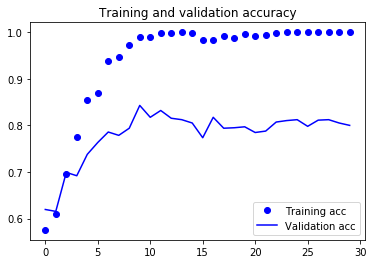

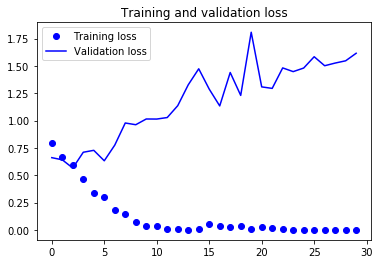

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [12]:
model.save('CarCrashModelMk6.h5')